In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn import metrics
from sklearn.cluster import KMeans


In [11]:
iris_df = pd.read_csv('datasets/Iris.csv',
                      skiprows=1,
                      names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])

iris_df.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris_df = iris_df.sample(frac=1).reset_index(drop=True)

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.5,2.5,4.0,1.3,Iris-versicolor
1,4.4,3.0,1.3,0.2,Iris-setosa
2,5.3,3.7,1.5,0.2,Iris-setosa
3,4.5,2.3,1.3,0.3,Iris-setosa
4,5.0,3.3,1.4,0.2,Iris-setosa


In [14]:
iris_df.shape


(150, 5)

In [16]:
iris_df['class'].unique()

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [17]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.5,2.5,4.0,1.3,1
1,4.4,3.0,1.3,0.2,0
2,5.3,3.7,1.5,0.2,0
3,4.5,2.3,1.3,0.3,0
4,5.0,3.3,1.4,0.2,0


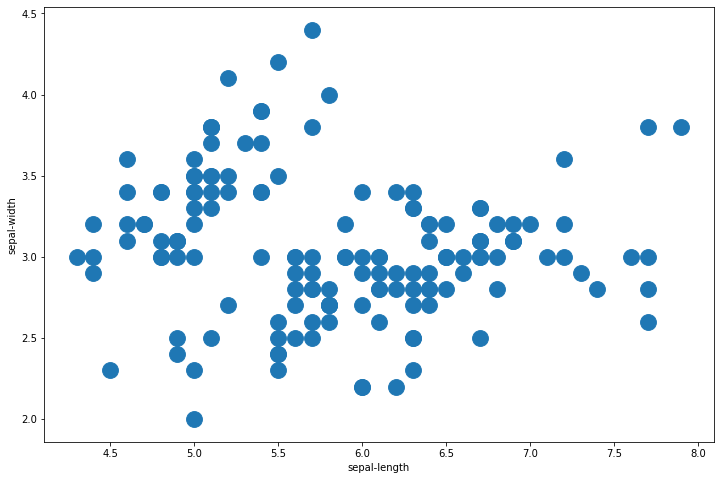

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(iris_df['sepal-length'], iris_df['sepal-width'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.show()

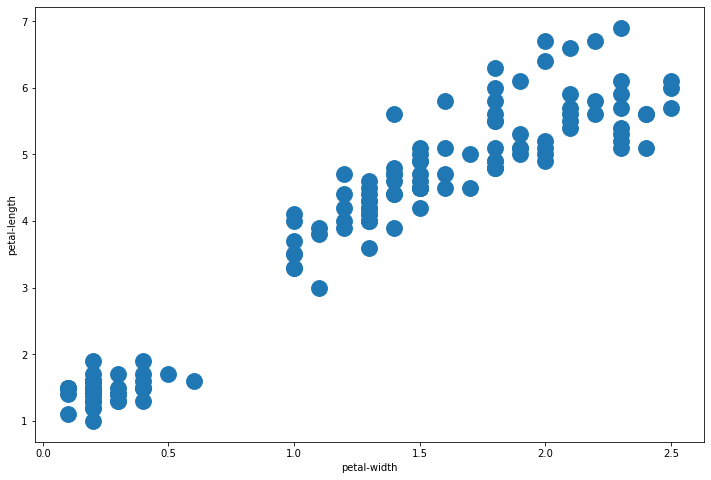

In [19]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(iris_df['petal-width'], iris_df['petal-length'], s=250)

plt.xlabel('petal-width')
plt.ylabel('petal-length')

plt.show()

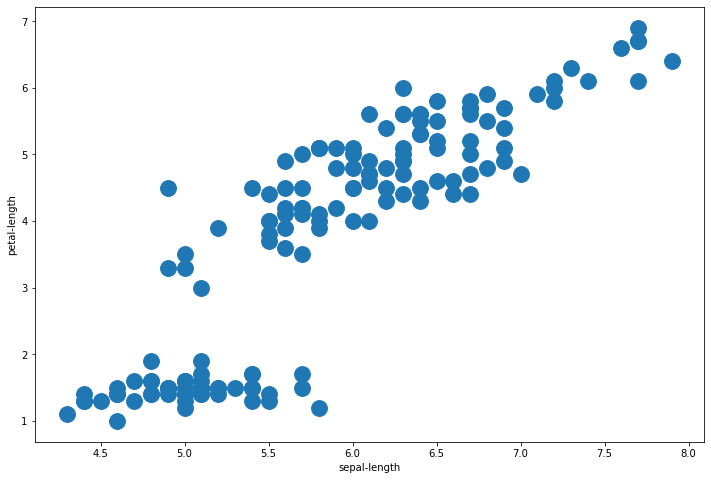

In [20]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('petal-length')

plt.show()

In [21]:
iris_2D = iris_df[['sepal-length', 'petal-length']]

iris_2D.sample(5)

,sepal-length,petal-length
32,6.2,4.3
94,4.9,1.5
63,4.6,1.5
15,5.4,1.7
19,5.7,1.7


In [22]:
iris_2D = np.array(iris_2D)

In [23]:
kmeans_model_2D = KMeans(n_clusters=3, max_iter = 1000).fit(iris_2D)

In [24]:
kmeans_model_2D.labels_

array([2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 1,
       1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 1, 2,
       1, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2,
       0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 1, 1, 1, 2])

In [25]:
centroids_2D = kmeans_model_2D.cluster_centers_

centroids_2D

array([[5.00784314, 1.49411765],
       [6.83902439, 5.67804878],
       [5.87413793, 4.39310345]])

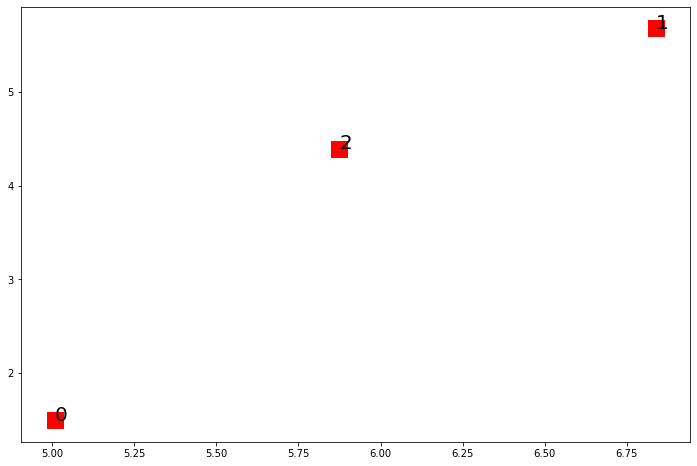

In [26]:
#centroids for all the 3 clusters
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=20)

In [27]:
iris_labels = iris_df['class']

In [29]:
print("Homogeniety score:", metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_))
print("Completeness:", metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))
print("v_measure score:", metrics.v_measure_score(iris_labels, kmeans_model_2D.labels_))
print("Adjusted rand score:", metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_))
print("Adjusted mutual info score:", metrics.adjusted_mutual_info_score(iris_labels, kmeans_model_2D.labels_))
print("Silhouette score:", metrics.silhouette_score(iris_2D, kmeans_model_2D.labels_))

Homogeniety score: 0.7033177646052958
Completeness: 0.7096993707802843
v_measure score: 0.706494157075837
Adjusted rand score: 0.6988627672348092
Adjusted mutual info score: 0.702802453140913
Silhouette score: 0.5890612473759282


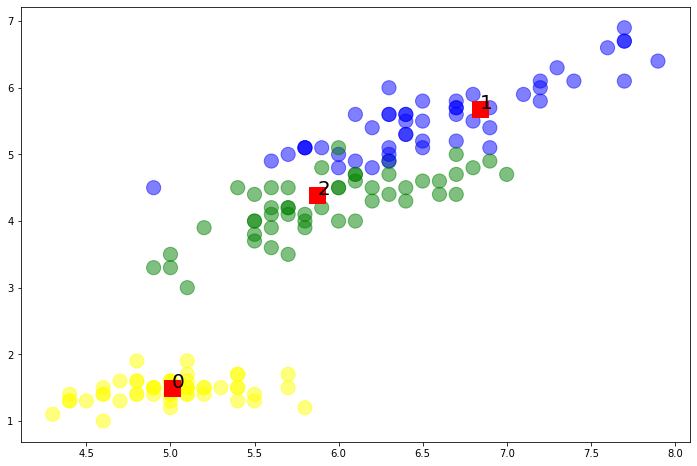

In [30]:
colors = ['yellow','green', 'blue']

plt.figure(figsize=(12,8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], c=iris_df['class'],
            s=200, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0] , centroids_2D[i][1]), fontsize=20)

In [31]:
iris_features = iris_df.drop('class', axis=1)

iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.5,2.5,4.0,1.3
1,4.4,3.0,1.3,0.2
2,5.3,3.7,1.5,0.2
3,4.5,2.3,1.3,0.3
4,5.0,3.3,1.4,0.2


In [32]:
iris_labels = iris_df['class']

iris_labels.sample(5)

122    1
54     0
94     0
39     0
95     2
Name: class, dtype: int32

In [33]:
kmeans_model = KMeans(n_clusters=3).fit(iris_features)

In [34]:
kmeans_model.labels_

array([0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       2, 2, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 1, 0, 2,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0,
       2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0,
       1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1,
       2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 2, 0])

In [35]:
kmeans_model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [36]:
print("Homogeniety score:", metrics.homogeneity_score(iris_labels, kmeans_model.labels_))
print("Completeness:", metrics.completeness_score(iris_labels, kmeans_model.labels_))
print("v_measure score:", metrics.v_measure_score(iris_labels, kmeans_model.labels_))
print("Adjusted rand score:", metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_))
print("Adjusted mutual info score:", metrics.adjusted_mutual_info_score(iris_labels, kmeans_model.labels_))
print("Silhouette score:", metrics.silhouette_score(iris_features, kmeans_model.labels_))

Homogeniety score: 0.7514854021988339
Completeness: 0.7649861514489816
v_measure score: 0.7581756800057786
Adjusted rand score: 0.7302382722834697
Adjusted mutual info score: 0.7551191675800484
Silhouette score: 0.5525919445499757
